<a href="https://colab.research.google.com/github/Sofia-Angel-Carlon/EJERCICIO_CLASE/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [24]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

In [26]:
print(train_images.shape)

(60000, 28, 28)


In [27]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)
train_images = train_images.astype('float32') / 255
# Imagenes y etiquetas de test.
# test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [28]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images=train_images[50000:]  
train_images=train_images[:49999]      

validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]

print(validation_images.shape)
print(validation_labels.shape)

(10000, 784)
(10000,)


In [29]:
def crea_modelo(regularizador):
  modelo = models.Sequential()
  if(regularizador==0):
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  elif(regularizador==1):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==2):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==3):
    modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(28*28,)))
  elif(regularizador==4):
    modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print("Error")
  
  modelo.add(layers.Dense(10, activation='softmax'))
  modelo.summary()
  return modelo

  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

In [30]:
def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop', # Optimizador 'rmsprop' (Stocastic Gradient Descendent)
                loss='sparse_categorical_crossentropy', # Función de pérdida
                metrics=['accuracy']) # Mética de Precisión
  return modelo 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo

In [31]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=30, batch_size=128)
  return history

  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [32]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [33]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [34]:
network0 = crea_modelo(0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
network0 = compila_modelo(network0)

In [36]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2880 - accuracy: 0.9153 - val_loss: 0.1396 - val_accuracy: 0.9616
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9654 - val_loss: 0.1132 - val_accuracy: 0.9691
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9771 - val_loss: 0.0849 - val_accuracy: 0.9754
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0793 - val_accuracy: 0.9754
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0711 - val_accuracy: 0.9791
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 0.0801 - val_accuracy: 0.9776
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9934 - val_loss: 0.0691 - val_accuracy: 0.9811
Epoch 

### Caso 1: Con regularizador l1

In [37]:
network1 = crea_modelo(1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
network1 = compila_modelo(network1)

In [39]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1359 - accuracy: 0.8450 - val_loss: 1.0143 - val_accuracy: 0.8771
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9613 - accuracy: 0.8796 - val_loss: 0.8772 - val_accuracy: 0.8967
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 0.8401 - accuracy: 0.8992 - val_loss: 0.7866 - val_accuracy: 0.9113
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7661 - accuracy: 0.9144 - val_loss: 0.6971 - val_accuracy: 0.9314
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7132 - accuracy: 0.9235 - val_loss: 0.6611 - val_accuracy: 0.9382
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6738 - accuracy: 0.9303 - val_loss: 0.6592 - val_accuracy: 0.9343
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6467 - accuracy: 0.9349 - val_loss: 0.6375 - val_accuracy: 0.9318
Epoch 

### Caso 2: Con regularizador l2

In [40]:
network2 = crea_modelo(2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [41]:
network2 = compila_modelo(network2)

In [42]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5269 - accuracy: 0.9124 - val_loss: 0.2887 - val_accuracy: 0.9571
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2618 - accuracy: 0.9552 - val_loss: 0.2480 - val_accuracy: 0.9536
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2098 - accuracy: 0.9630 - val_loss: 0.2066 - val_accuracy: 0.9626
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1870 - accuracy: 0.9664 - val_loss: 0.1779 - val_accuracy: 0.9704
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.1735 - accuracy: 0.9697 - val_loss: 0.1673 - val_accuracy: 0.9720
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1639 - accuracy: 0.9718 - val_loss: 0.1772 - val_accuracy: 0.9690
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1574 - accuracy: 0.9718 - val_loss: 0.1732 - val_accuracy: 0.9689
Epoch 

### Caso 3: Con regularizador l1_l2

In [43]:
network3 = crea_modelo(3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [44]:
network3 = compila_modelo(network3)

In [45]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 3s 5ms/step - loss: 2.1558 - accuracy: 0.8424 - val_loss: 0.9917 - val_accuracy: 0.8932
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9831 - accuracy: 0.8749 - val_loss: 0.8914 - val_accuracy: 0.8956
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8606 - accuracy: 0.8977 - val_loss: 0.7830 - val_accuracy: 0.9238
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7888 - accuracy: 0.9114 - val_loss: 0.7197 - val_accuracy: 0.9318
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7343 - accuracy: 0.9213 - val_loss: 0.6904 - val_accuracy: 0.9354
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6968 - accuracy: 0.9273 - val_loss: 0.6784 - val_accuracy: 0.9306
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6658 - accuracy: 0.9321 - val_loss: 0.6490 - val_accuracy: 0.9389
Epoch 

### Caso 4: Con Droput

In [46]:
network4 = crea_modelo(4)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
network4 = compila_modelo(network4)

In [48]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3488 - accuracy: 0.8976 - val_loss: 0.1628 - val_accuracy: 0.9550
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1695 - accuracy: 0.9497 - val_loss: 0.1127 - val_accuracy: 0.9679
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.9679 - val_loss: 0.0921 - val_accuracy: 0.9747
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0938 - accuracy: 0.9720 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0835 - accuracy: 0.9749 - val_loss: 0.0798 - val_accuracy: 0.9763
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0833 - val_accuracy: 0.9770
Epoch 

### Caso 5: Error de código de regularizador

In [49]:
network5 = crea_modelo(5)

Error


ValueError: ignored

###GRÁFICAS

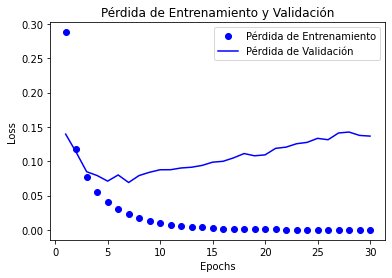

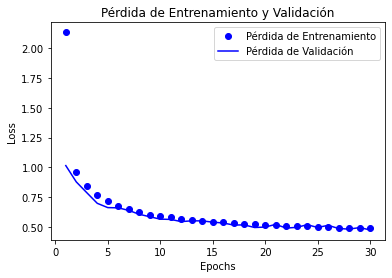

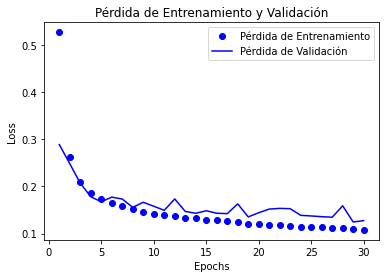

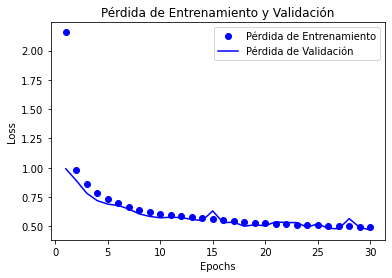

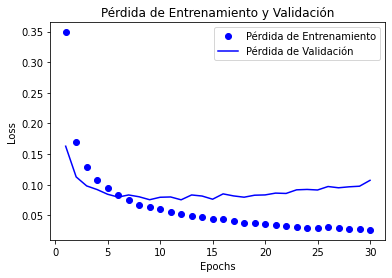

In [50]:
pinta_perdida_entrenamiento_validacion(historia0)
pinta_perdida_entrenamiento_validacion(historia1)
pinta_perdida_entrenamiento_validacion(historia2)
pinta_perdida_entrenamiento_validacion(historia3)
pinta_perdida_entrenamiento_validacion(historia4)

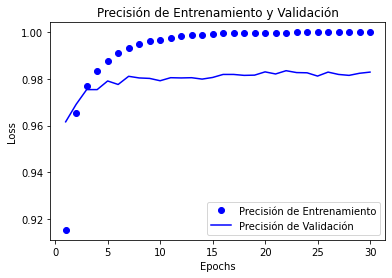

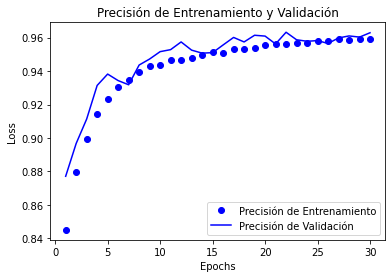

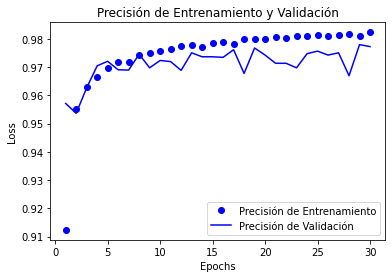

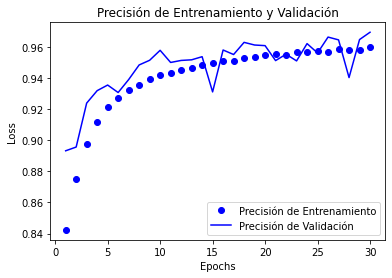

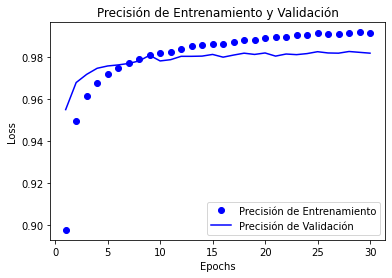

In [51]:
pinta_precision_entrenamiento_validacion(historia0)
pinta_precision_entrenamiento_validacion(historia1)
pinta_precision_entrenamiento_validacion(historia2)
pinta_precision_entrenamiento_validacion(historia3)
pinta_precision_entrenamiento_validacion(historia4)

### CONCLUSIONES

Todos los modelos obtienen una precisión entorno al 96%, en cuánto a las pérdidas si hay diferencias entre unos modelos y otros. Entonces, el modelo que mejor resulta en este caso es el cuarto con regularizador dropout, es en el que hemos obtenido la mayor precisión consiguiendo un 99%. Por otro lado, el tercer modelo con el regularizador L2 consigue un 98% de precisión y le sigue el modelo con los dos regularizadores con un 96% de precisión.